In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.dummy import DummyRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import  confusion_matrix

<h2>Importando dataset </h2><h3>Dados históricos do preço diário do café dos anos 2011 até 2020</h3>

<h4>
    <span style="color: #00008B">brl_price_yesterday</span>: Preço em BRL do dia anterior (ontem)<br><br>
    <span style="color: #00008B">brl_price_yesterday-1</span>: Preço em BRL do dia precedente ao anterior (anteontem)<br><br>
    <span style="color: #00008B">var_brl_price_yesterday</span>: Variação em BRL dos dias anteriores (ontem e anteontem)<br><br>
    <span style="color: #00008B">var_usd_price_yesterday</span>: Variação em USD dos dias anteriores (ontem e anteontem)<br><br>
    <span style="color: #00008B">usd</span>: Preço do dolar para o câmbio BRL -> USD<br><br>
    <span style="color: #00008B">brl_price</span>: Preço da saca em BRL
</h4>

In [2]:
df = pd.read_csv('../data/dataset.csv')
df['data'] = pd.to_datetime(df['data'])
df = df.set_index("data")
df.head()

,brl_price_yesterday,brl_price_yesterday-1,var_brl_price_yesterday,var_usd_price_yesterday,usd,brl_price
data,,,,,,
2012-06-01,476.49,481.49,-5.00,0.68,1.8579,481.91
2012-09-01,481.91,476.49,5.42,5.80,1.8329,488.41
2012-10-01,488.41,481.91,6.50,6.87,1.7995,491.50
2012-11-01,491.50,488.41,3.09,7.60,1803.0000,504.65
2012-12-01,504.65,491.50,13.15,0.88,1778.0000,501.74


<h2>Aplicando modelos de ML e IA</h2>
<h3>Modelos aplicados dentro de uma série temporal</h3>

In [3]:
year_list = df.index.year.unique().tolist()
splits = {'train': [], 'test': []}

for idx, yr in enumerate(year_list[:-1]):
    train_yr = year_list[:idx+1]
    test_yr = [year_list[idx+1]]
    print('TRAIN: ', train_yr, 'TEST: ',test_yr)
    
    splits['train'].append(df.loc[df.index.year.isin(train_yr), :])
    splits['test'].append(df.loc[df.index.year.isin(test_yr), :])
    
    X_train = splits['train'][idx].drop(['brl_price'], axis = 1).values # X
    y_train = splits['train'][idx]['brl_price'].values # Y
    
    X_test =  splits['test'][idx].drop(['brl_price'], axis = 1).values
    y_test = splits['test'][idx]['brl_price'].values
    
##  Linear Regressor
    lr_reg = LinearRegression().fit(X_train, y_train)
    lr_pred = lr_reg.predict(X_test)
    
##  MLP Regressor
    mlp_reg = MLPRegressor(random_state=1, max_iter=600).fit(X_train, y_train)
    mlp_pred = mlp_reg.predict(X_test)

##  KNN Regressor
    knn_reg = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
    knn_pred = knn_reg.predict(X_test)

##  Decision Tree Regressor
    tree_reg = DecisionTreeRegressor().fit(X_train, y_train)
    tree_pred = tree_reg.predict(X_test)

##  GaussianNB Regressor
    bayes_reg = linear_model.BayesianRidge().fit(X_train, y_train)
    bayes_pred = bayes_reg.predict(X_test)

##  Dummy Regressor
    dummy_reg = DummyRegressor(strategy="median").fit(X_train, y_train)
    dummy_pred = dummy_reg.predict(X_test)
    

TRAIN:  [2012] TEST:  [2013]
TRAIN:  [2012, 2013] TEST:  [2014]
TRAIN:  [2012, 2013, 2014] TEST:  [2015]
TRAIN:  [2012, 2013, 2014, 2015] TEST:  [2016]
TRAIN:  [2012, 2013, 2014, 2015, 2016] TEST:  [2017]
TRAIN:  [2012, 2013, 2014, 2015, 2016, 2017] TEST:  [2018]
TRAIN:  [2012, 2013, 2014, 2015, 2016, 2017, 2018] TEST:  [2019]
TRAIN:  [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019] TEST:  [2020]


<h2>Precisão dos modelos</h2>
<h3>Scores referentes ao último ano do dadaset: 2020</h3>

In [4]:
print('LR SCORE: ', r2_score(y_test, lr_pred))
print('MLP SCORE: ', r2_score(y_test, mlp_pred))
print('KNN SCORE: ', r2_score(y_test, knn_pred))
print('TREE SCORE: ', r2_score(y_test, tree_pred))
print("BAYES SCORE: ", r2_score(y_test, bayes_pred))
print('DUMMY SCORE: ', r2_score(y_test, dummy_pred), '\n')

LR SCORE:  0.9825239588972645
MLP SCORE:  0.9815081700328495
KNN SCORE:  0.5719265161107357
TREE SCORE:  0.826672455961569
BAYES SCORE:  0.9825184467921523
DUMMY SCORE:  -6.1918704506496995 



<h2>Analise dos resultados obtidos pelos modelos</h2>
<h3>Principais features, modelos, comparação entre valor real e predito</h3>

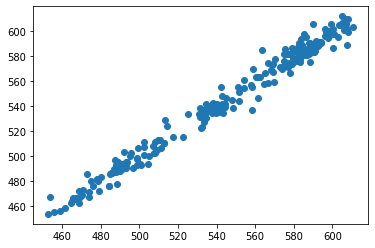

In [5]:
import matplotlib.pyplot as plt
plt.scatter(y_test, lr_pred)

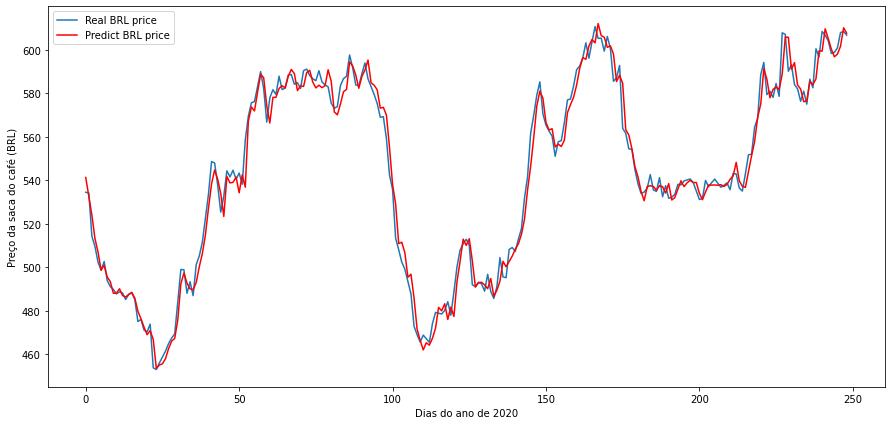

In [6]:
plt.subplots(figsize=(15, 7))
plt.plot(y_test, label='Real BRL price')
plt.plot(lr_pred, color='red', label='Predict BRL price')
plt.ylabel('Preço da saca do café (BRL)')
plt.xlabel('Dias do ano de 2020')
plt.legend()